# Phase 2: Data Preparation & EDA

**CSCA 5642 - Final Project**  
**University of Colorado Boulder**

---

## Objectives

1. Load and explore aviation emissions dataset
2. Perform exploratory data analysis (EDA)
3. Engineer features for model training
4. Split data into train/validation/test sets
5. Save processed data for subsequent notebooks

## Setup

In [19]:
import sys
sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Import src modules
from src.data_processing import (
    generate_synthetic_aviation_data,
    engineer_features,
    encode_categorical_features,
    split_data,
    scale_features
)

# Set visualization style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
np.random.seed(42)

print('✓ Libraries and modules imported successfully!')

✓ Libraries and modules imported successfully!


## 1. Data Loading & Generation

In [20]:
# Generate synthetic aviation emissions dataset using src module
# This creates realistic aviation data with aircraft types, flight phases, and emissions
df = generate_synthetic_aviation_data(n_samples=5000, random_state=42)

print(f'Dataset shape: {df.shape}')
print(f'\nFirst few rows:')
df.head()

Dataset shape: (5000, 9)

First few rows:


,aircraft_type,flight_phase,altitude_ft,speed_knots,weight_tons,route_distance_nm,temperature_c,wind_speed_knots,co2_kg
0,A321,approach,1325.456554,182.375280,89.104239,2730.413242,-33.001756,-4.075111,46.409385
1,B738,approach,4864.594335,186.595411,61.829295,1172.767307,-27.161684,-19.575776,35.265844
2,B737,descent,5576.560626,302.477466,66.353410,375.327413,28.162886,-26.722866,30.259923
3,A321,descent,19810.364222,254.645041,89.701003,1106.092330,-35.446388,44.888554,20.677458
4,A380,climb,14104.161086,202.394938,424.658370,1522.050250,7.828446,10.999666,798.417949


## 2. Exploratory Data Analysis

In [21]:
# Dataset info and statistics
print('Dataset Information:')
print('='*50)
df.info()

print('\nBasic Statistics:')
print('='*50)
df.describe()

# Check for missing values
print('\nMissing Values:')
missing = df.isnull().sum()
print('No missing values found!' if missing.sum() == 0 else missing[missing > 0])

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   aircraft_type      5000 non-null   object 
 1   flight_phase       5000 non-null   object 
 2   altitude_ft        5000 non-null   float64
 3   speed_knots        5000 non-null   float64
 4   weight_tons        5000 non-null   float64
 5   route_distance_nm  5000 non-null   float64
 6   temperature_c      5000 non-null   float64
 7   wind_speed_knots   5000 non-null   float64
 8   co2_kg             5000 non-null   float64
dtypes: float64(7), object(2)
memory usage: 351.7+ KB

Basic Statistics:

Missing Values:
No missing values found!


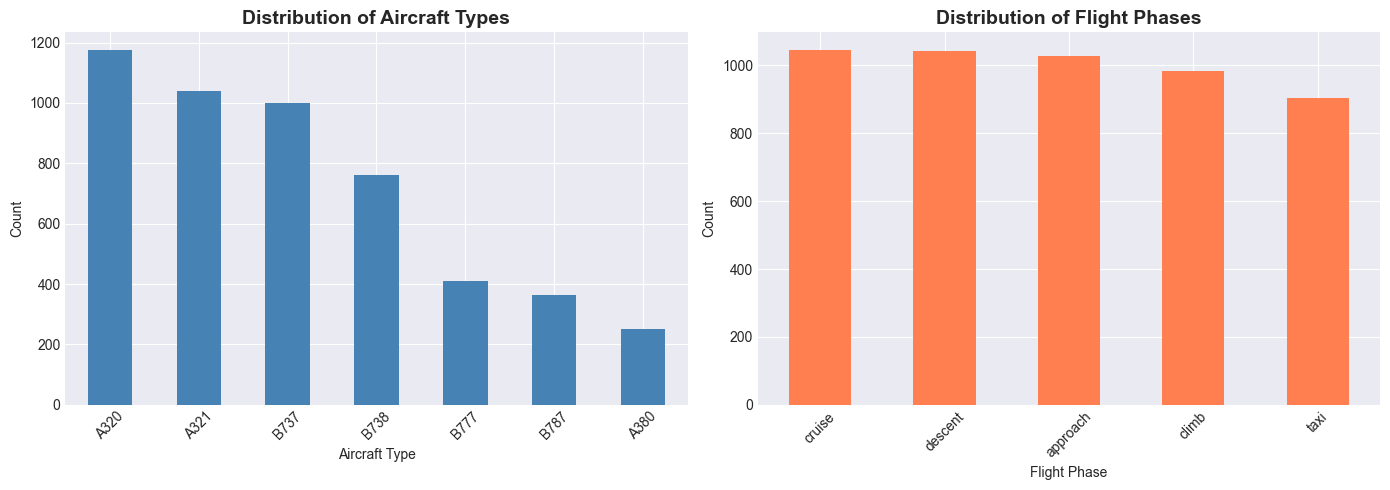

In [22]:
# Distribution of categorical features
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

df['aircraft_type'].value_counts().plot(kind='bar', ax=axes[0], color='steelblue')
axes[0].set_title('Distribution of Aircraft Types', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Aircraft Type')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)

df['flight_phase'].value_counts().plot(kind='bar', ax=axes[1], color='coral')
axes[1].set_title('Distribution of Flight Phases', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Flight Phase')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

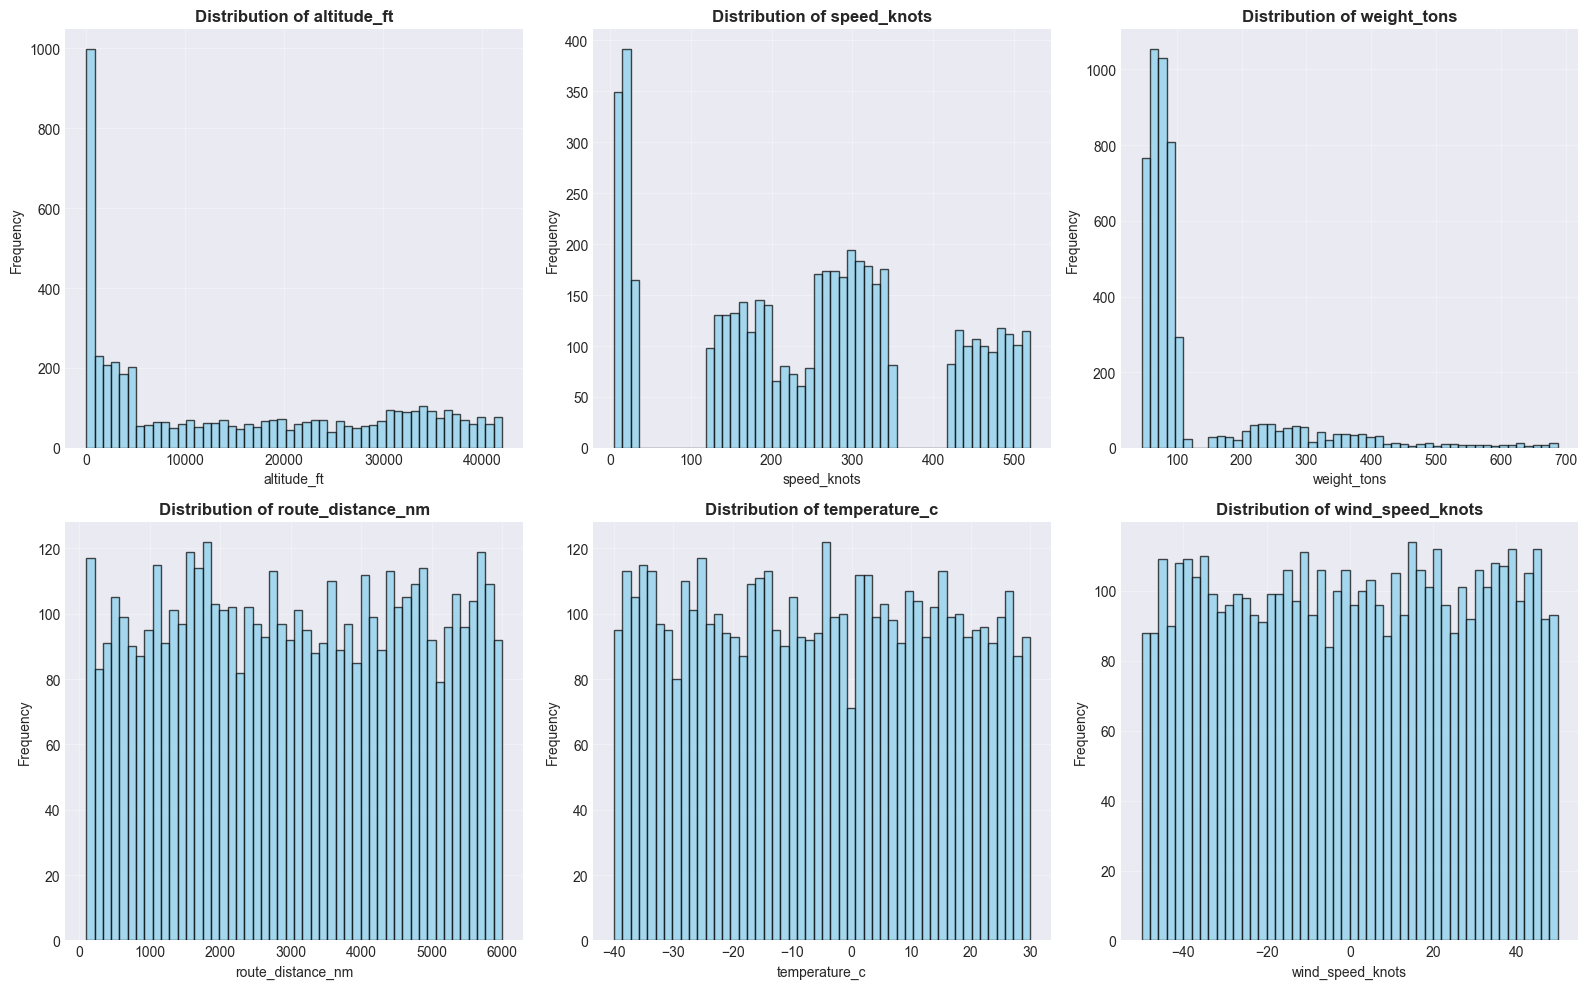

In [23]:
# Distribution of continuous features
fig, axes = plt.subplots(2, 3, figsize=(16, 10))

continuous_features = ['altitude_ft', 'speed_knots', 'weight_tons', 
                       'route_distance_nm', 'temperature_c', 'wind_speed_knots']

for idx, feature in enumerate(continuous_features):
    row, col = idx // 3, idx % 3
    axes[row, col].hist(df[feature], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
    axes[row, col].set_title(f'Distribution of {feature}', fontweight='bold')
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel('Frequency')
    axes[row, col].grid(alpha=0.3)

plt.tight_layout()
plt.show()

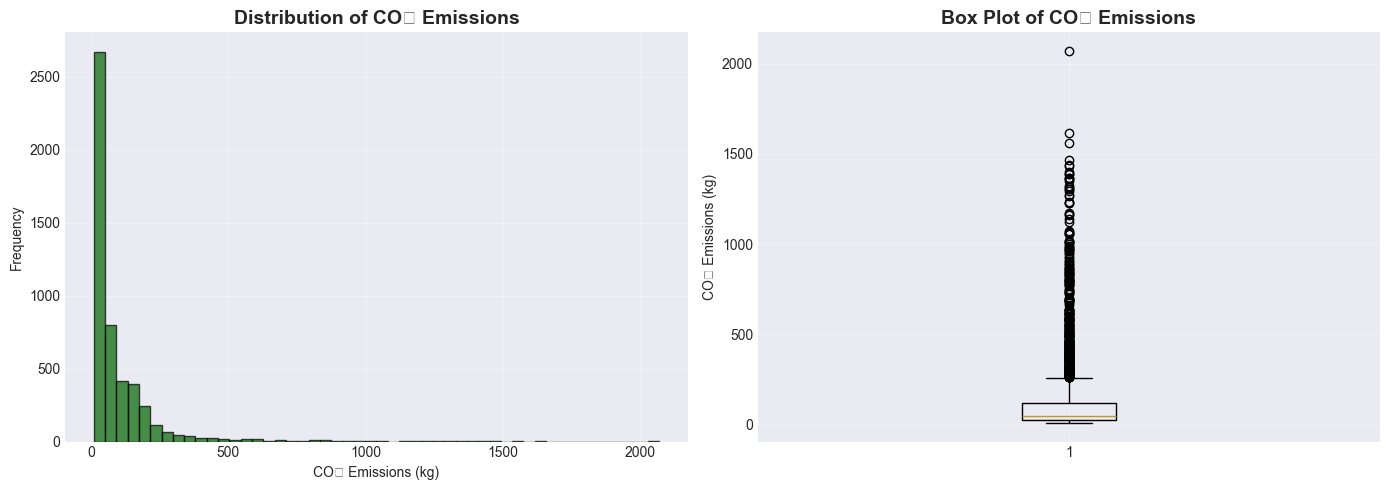

CO₂ Emissions Statistics:
  Mean: 102.57 kg
  Median: 46.74 kg
  Std Dev: 162.02 kg
  Min: 10.00 kg
  Max: 2069.67 kg


In [24]:
# Target variable distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].hist(df['co2_kg'], bins=50, color='darkgreen', edgecolor='black', alpha=0.7)
axes[0].set_title('Distribution of CO₂ Emissions', fontsize=14, fontweight='bold')
axes[0].set_xlabel('CO₂ Emissions (kg)')
axes[0].set_ylabel('Frequency')
axes[0].grid(alpha=0.3)

axes[1].boxplot(df['co2_kg'], vert=True)
axes[1].set_title('Box Plot of CO₂ Emissions', fontsize=14, fontweight='bold')
axes[1].set_ylabel('CO₂ Emissions (kg)')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print(f'CO₂ Emissions Statistics:')
print(f'  Mean: {df["co2_kg"].mean():.2f} kg')
print(f'  Median: {df["co2_kg"].median():.2f} kg')
print(f'  Std Dev: {df["co2_kg"].std():.2f} kg')
print(f'  Min: {df["co2_kg"].min():.2f} kg')
print(f'  Max: {df["co2_kg"].max():.2f} kg')

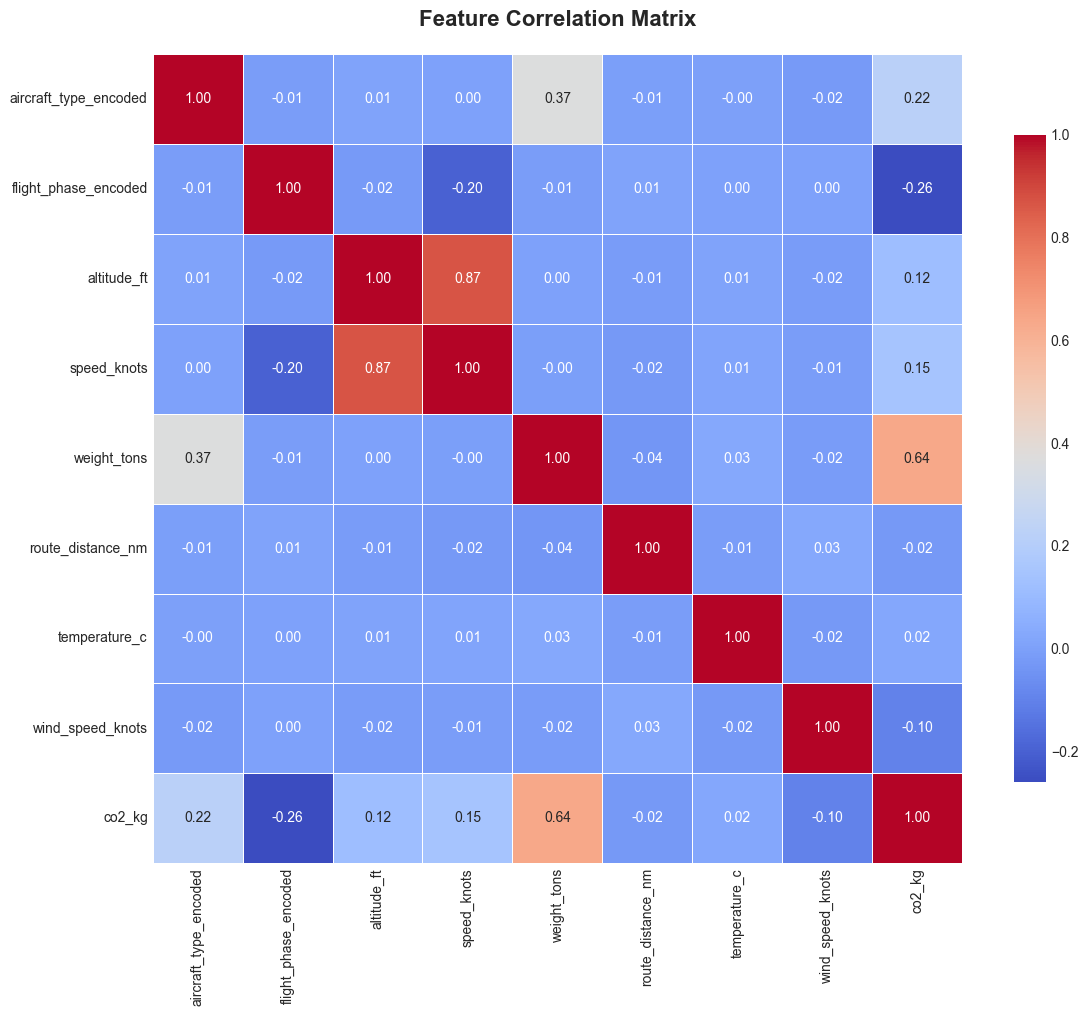


Correlations with CO₂ Emissions:
co2_kg                   1.000000
weight_tons              0.639373
aircraft_type_encoded    0.222187
speed_knots              0.146581
altitude_ft              0.115651
temperature_c            0.023220
route_distance_nm       -0.024707
wind_speed_knots        -0.098398
flight_phase_encoded    -0.259934
Name: co2_kg, dtype: float64


In [25]:
# Correlation matrix (with encoding for categorical variables)
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()
le_aircraft = LabelEncoder()
le_phase = LabelEncoder()
df_encoded['aircraft_type_encoded'] = le_aircraft.fit_transform(df_encoded['aircraft_type'])
df_encoded['flight_phase_encoded'] = le_phase.fit_transform(df_encoded['flight_phase'])

numeric_cols = ['aircraft_type_encoded', 'flight_phase_encoded', 'altitude_ft', 
                'speed_knots', 'weight_tons', 'route_distance_nm', 
                'temperature_c', 'wind_speed_knots', 'co2_kg']
corr_matrix = df_encoded[numeric_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Matrix', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print('\nCorrelations with CO₂ Emissions:')
print(corr_matrix['co2_kg'].sort_values(ascending=False))

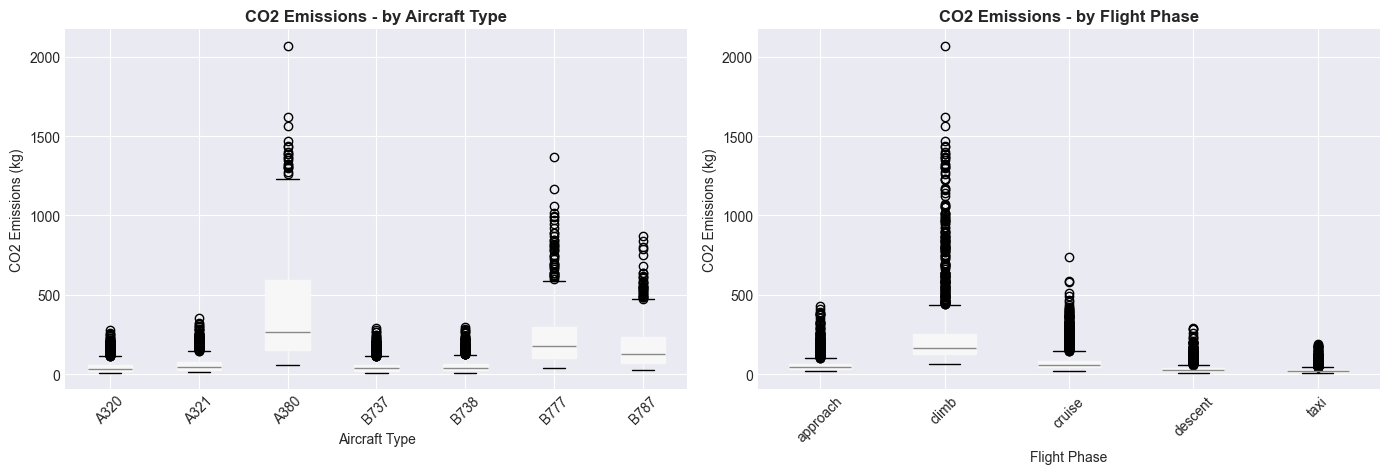

In [26]:
# CO2 emissions by aircraft type and flight phase
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

df.boxplot(column='co2_kg', by='aircraft_type', ax=axes[0], patch_artist=True)
axes[0].set_title('CO2 Emissions - by Aircraft Type', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Aircraft Type')
axes[0].set_ylabel('CO2 Emissions (kg)')
plt.sca(axes[0])
plt.xticks(rotation=45)

df.boxplot(column='co2_kg', by='flight_phase', ax=axes[1], patch_artist=True)
axes[1].set_title('CO2 Emissions - by Flight Phase', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Flight Phase')
axes[1].set_ylabel('CO2 Emissions (kg)')
plt.sca(axes[1])
plt.xticks(rotation=45)

plt.suptitle('')
plt.tight_layout()
plt.show()

## 3. Feature Engineering & Encoding

In [27]:
# Feature engineering
#   -- Creating speed-weight ratio, altitude categories, heavy aircraft flag, and wind impact
df_engineered = engineer_features(df)

print('Engineered features created:')
print(df_engineered[['speed_weight_ratio', 'altitude_category', 'is_heavy', 'wind_impact']].head())

Engineered features created:
   speed_weight_ratio altitude_category  is_heavy  wind_impact
0            2.046763               low         0     4.075111
1            3.017913               low         0    19.575776
2            4.558582            medium         0    26.722866
3            2.838820            medium         0   -44.888554
4            0.476606            medium         1   -10.999666


In [28]:
# One-hot encode categorical features using src module
df_processed = encode_categorical_features(df_engineered)

print(f'Dataset shape after encoding: {df_processed.shape}')
print(f'\nColumns after encoding: {len(df_processed.columns)} features')

Dataset shape after encoding: (5000, 26)

Columns after encoding: 26 features


## 4. Data Splitting & Scaling

In [29]:
# Separate features and target
X = df_processed.drop('co2_kg', axis=1)
y = df_processed['co2_kg']

# Split data using src module (70% train, 15% val, 15% test)
X_train, X_val, X_test, y_train, y_val, y_test = split_data(
    X, y, test_size=0.15, val_size=0.15, random_state=42
)

print(f'Training set size: {X_train.shape[0]} ({X_train.shape[0]/len(X)*100:.1f}%)')
print(f'Validation set size: {X_val.shape[0]} ({X_val.shape[0]/len(X)*100:.1f}%)')
print(f'Test set size: {X_test.shape[0]} ({X_test.shape[0]/len(X)*100:.1f}%)')

Training set size: 3500 (70.0%)
Validation set size: 750 (15.0%)
Test set size: 750 (15.0%)


In [30]:
# Scale features using StandardScaler (important for neural networks)
scaler, X_train_scaled, X_val_scaled, X_test_scaled = scale_features(
    X_train, X_val, X_test
)

print('Features scaled using StandardScaler')
print(f'\nScaled training data sample:')
print(X_train_scaled.head())

Features scaled using StandardScaler

Scaled training data sample:
      altitude_ft  speed_knots  weight_tons  route_distance_nm  temperature_c  \
3539     1.278624     1.348895    -0.304377          -0.503483       0.154638   
3931    -0.999659    -0.362618    -0.283416          -1.490271       0.124934   
520     -1.013356    -0.871112    -0.398498           1.652364      -0.430027   
4688     0.417365     0.445405    -0.356584          -0.269544       1.032964   
2563    -1.033047    -0.548687    -0.194433          -1.651975      -1.476610   

      wind_speed_knots  speed_weight_ratio  is_heavy  wind_impact  \
3539         -0.798752            0.888268 -0.467614     0.798752   
3931          0.849862           -0.373793 -0.467614    -0.849862   
520          -0.511280           -0.632714 -0.467614     0.511280   
4688         -1.572672            0.349608 -0.467614     1.572672   
2563         -0.164113           -0.586073 -0.467614     0.164113   

      aircraft_A320  ...  aircr

## 5. Save Processed Data

In [31]:
import os
import pickle

# Create directories
os.makedirs('../data/processed', exist_ok=True)
os.makedirs('../models', exist_ok=True)

# Save processed datasets (scaled)
train_data = pd.concat([X_train_scaled, y_train], axis=1)
val_data = pd.concat([X_val_scaled, y_val], axis=1)
test_data = pd.concat([X_test_scaled, y_test], axis=1)

train_data.to_csv('../data/processed/train_data.csv', index=False)
val_data.to_csv('../data/processed/val_data.csv', index=False)
test_data.to_csv('../data/processed/test_data.csv', index=False)

# Save unscaled data for CTGAN
train_data_unscaled = pd.concat([X_train, y_train], axis=1)
train_data_unscaled.to_csv('../data/processed/train_data_unscaled.csv', index=False)

# Save scaler for later use
with open('../models/scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

print('✓ Saved processed datasets:')
print('  - ../data/processed/train_data.csv (scaled)')
print('  - ../data/processed/val_data.csv (scaled)')
print('  - ../data/processed/test_data.csv (scaled)')
print('  - ../data/processed/train_data_unscaled.csv (for CTGAN)')
print('  - ../models/scaler.pkl')

✓ Saved processed datasets:
  - ../data/processed/train_data.csv (scaled)
  - ../data/processed/val_data.csv (scaled)
  - ../data/processed/test_data.csv (scaled)
  - ../data/processed/train_data_unscaled.csv (for CTGAN)
  - ../models/scaler.pkl


## 6. Summary

In [32]:
print('='*70)
print('DATA PREPARATION SUMMARY')
print('='*70)
print(f'\nOriginal dataset size: {df.shape[0]} samples, {df.shape[1]} features')
print(f'After feature engineering & encoding: {X.shape[0]} samples, {X.shape[1]} features')
print(f'\nData split:')
print(f'  Training: {X_train.shape[0]} samples ({X_train.shape[0]/len(X)*100:.1f}%)')
print(f'  Validation: {X_val.shape[0]} samples ({X_val.shape[0]/len(X)*100:.1f}%)')
print(f'  Test: {X_test.shape[0]} samples ({X_test.shape[0]/len(X)*100:.1f}%)')
print(f'\nTarget variable (CO₂ emissions) statistics:')
print(f'  Train mean: {y_train.mean():.2f} kg')
print(f'  Train std: {y_train.std():.2f} kg')
print(f'\nData preparation complete!')
print(f'\nNext: Run 02_baseline_model.ipynb to train baseline')
print('='*70)

DATA PREPARATION SUMMARY

Original dataset size: 5000 samples, 9 features
After feature engineering & encoding: 5000 samples, 25 features

Data split:
  Training: 3500 samples (70.0%)
  Validation: 750 samples (15.0%)
  Test: 750 samples (15.0%)

Target variable (CO₂ emissions) statistics:
  Train mean: 102.44 kg
  Train std: 161.54 kg

Data preparation complete!

Next: Run 02_baseline_model.ipynb to train baseline
